In [1]:
import numpy as np
import cv2
import glob
import keras
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten,BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import matplotlib.pyplot as plt 
from keras.callbacks import Callback
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score

Using TensorFlow backend.


In [2]:
# total_images = []
# total_label = []
# for i in range(2):
#     print('i: ', i)
#     for j in range(2):
#         for k in range(12):
#             for l in range(2):
#                 string = str(i)+'_'+str(j)+'_'+str(k)+'_'+str(l)
#                 files = glob.glob("../../assignment1/q1/images/%s/*.jpg"%(string)) # image path
#                 for myFile in files:
#                     image = cv2.imread (myFile)
#                     total_images.append (image)
#                     total_label.append((i,j,k,l))

In [3]:
batch_size = 312
num_classes = 96
epochs = 3


# input image dimensions
img_rows, img_cols = 28, 28
input_shape = (img_rows, img_cols, 3)

In [4]:
# total_images = np.array(total_images,dtype=float)
# total_label = np.array(total_label,dtype=float)

In [5]:
total_images = np.load('data/images.npy')
total_label = np.load('data/labels.npy')

In [6]:
# np.save('data/images',total_images)
# np.save('data/labels',total_label)

In [7]:
total_images.shape
total_images=total_images/255

In [8]:
n=total_images.shape[0]

In [9]:
total_labels = np.zeros(shape=(n, 96), dtype=float)
#one hot encodeing
for i,t in enumerate(total_label):
    n2 = int(48*t[0]+24*t[1]+t[2]*2+int(t[3]))
    total_labels[i][n2] = 1

print(total_labels.shape)

(96000, 96)


In [10]:
#for decoding
def decoder(n):
    i=int(n/48)
    j=int((n%48)/24)
    k=int(((n%48)%24)/2)
    l=int(((n%48)%24)%2)
    return i,j,k,l

[0. 0. 1. 1.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


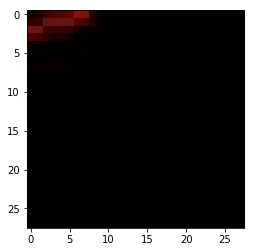

(0, 0, 1, 1)

In [11]:
#for testing the data
g=3000

print(total_label[g])
imgplot = plt.imshow(total_images[g])
print(total_labels[g])
plt.show()
decoder(np.argmax(total_labels[g]))

In [12]:
def shuffle(a,b):
    indices = np.arange(a.shape[0])
    np.random.shuffle(indices)
    a = a[indices]
    b = b[indices]
    return a,b

In [13]:
#shuffling images
total_images, total_labels=shuffle(total_images, total_labels)

In [14]:
#splitting data into test and train
train_images = total_images[:72000]
train_labels = total_labels[:72000]
test_images = total_images[72000:]
test_labels = total_labels[72000:]

In [15]:
model = Sequential()
model.add(Conv2D(50, kernel_size=(7,7),
                 strides=(1, 1),
                 activation='relu',
                 input_shape=input_shape))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

In [16]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

In [17]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 22, 22, 50)        7400      
_________________________________________________________________
batch_normalization_1 (Batch (None, 22, 22, 50)        200       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 50)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6050)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              6196224   
_________________________________________________________________
dense_2 (Dense)              (None, 96)                98400     
Total params: 6,302,224
Trainable params: 6,302,124
Non-trainable params: 100
________________________________________________________________

In [18]:
history=model.fit(train_images,train_labels,
          batch_size=batch_size,
          verbose=1,
          validation_split=0.1,
          epochs=epochs)

Train on 64800 samples, validate on 7200 samples
Epoch 1/3
64800/64800 [==============================] - 19s 299us/step - loss: 0.8545 - acc: 0.7701 - val_loss: 0.4218 - val_acc: 0.8575
Epoch 2/3
64800/64800 [==============================] - 14s 215us/step - loss: 0.0132 - acc: 0.9976 - val_loss: 0.0529 - val_acc: 0.9825
Epoch 3/3
64800/64800 [==============================] - 14s 214us/step - loss: 0.0038 - acc: 0.9994 - val_loss: 0.0163 - val_acc: 0.9944


In [19]:
model.save("Line_CNN")

In [20]:
score = model.evaluate(test_images, test_labels)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

24000/24000 [==============================] - 3s 132us/step
Test loss: 0.011849535492714494
Test accuracy: 0.996875


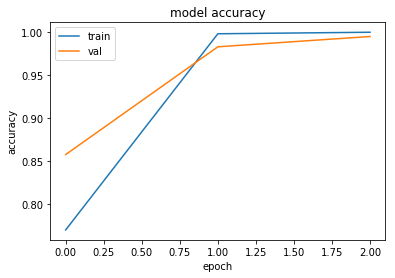

In [21]:
# summarize history for accuracy

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

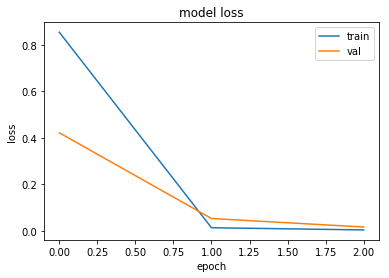

In [22]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

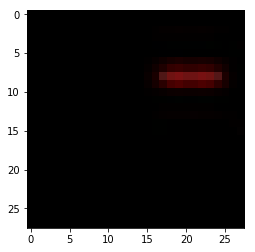

In [23]:
imgplot = plt.imshow(test_images[0])
plt.show()

In [24]:
y_pred = model.predict(test_images)
Y_pred = model.predict_classes(test_images, verbose=0)
print(Y_pred)

[ 1  8 16 ... 74 83 42]


In [25]:
temp=np.argmax(test_labels, axis=1)
print(temp)

[ 1  8 16 ... 74 83 42]


In [26]:
confusion_matrix = confusion_matrix(temp, Y_pred)

In [27]:
print(confusion_matrix)

[[268   4   0 ...   0   0   0]
 [  0 231   0 ...   0   0   0]
 [  0   0 259 ...   0   0   0]
 ...
 [  0   0   0 ... 255   0   0]
 [  0   0   0 ...   0 264   0]
 [  0   0   0 ...   0   0 241]]


In [28]:
f_scores= f1_score(temp,Y_pred,average=None)

In [29]:
print(f_scores)

[0.99259259 0.91848907 0.99807322 0.91914894 0.99800399 0.985138
 1.         0.99625468 1.         0.98412698 1.         0.99092559
 1.         1.         0.97847358 0.99245283 0.97912713 0.99118943
 1.         1.         0.99593496 1.         0.99570815 0.99032882
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         0.99596774 1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         0.99593496 1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.        ]


In [30]:
np.save("confusion_line.npy",confusion_matrix)
np.save("f_scores_line.npy",f_scores)